In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This Notebook is to clean a dataset and see how many values are left if the dataset is filtered by the -9, -8, and -7 conditions as per the Heloc Data Dictionary

In [45]:
df = pd.read_csv('heloc_dataset_v1.csv')
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [46]:
# let's check the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [47]:
#Check for Null Values
df.isna().any()

RiskPerformance                       False
ExternalRiskEstimate                  False
MSinceOldestTradeOpen                 False
MSinceMostRecentTradeOpen             False
AverageMInFile                        False
NumSatisfactoryTrades                 False
NumTrades60Ever2DerogPubRec           False
NumTrades90Ever2DerogPubRec           False
PercentTradesNeverDelq                False
MSinceMostRecentDelq                  False
MaxDelq2PublicRecLast12M              False
MaxDelqEver                           False
NumTotalTrades                        False
NumTradesOpeninLast12M                False
PercentInstallTrades                  False
MSinceMostRecentInqexcl7days          False
NumInqLast6M                          False
NumInqLast6Mexcl7days                 False
NetFractionRevolvingBurden            False
NetFractionInstallBurden              False
NumRevolvingTradesWBalance            False
NumInstallTradesWBalance              False
NumBank2NatlTradesWHighUtilizati

In [48]:
#encoding risk performance to binary, no null values in column.
df['RiskPerformance'].replace('Bad', 1, inplace= True)
df['RiskPerformance'].replace('Good', 0, inplace= True)

In [49]:
df.describe()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,0.521943,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,0.499542,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,0.000000,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,1.000000,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,1.000000,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,1.000000,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [50]:
df.describe()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,0.521943,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,0.499542,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,0.000000,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,1.000000,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,1.000000,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,1.000000,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [51]:
#Dropping -9 and filtering df by Risk Estimate as it is a "VIP"
df[df['ExternalRiskEstimate'] == -9]


# Should we keep the -9 entires as an alternative table?
# We can label it as categorical string values to avoid numerical calculation?

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
55,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
64,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
66,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
67,1,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
70,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10418,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
10420,1,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
10421,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
10432,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [52]:
df_full = df
df = df[df['ExternalRiskEstimate'] != -9]

#Keep df table with no -9 entires 

In [53]:
#Used the commented code below to see which tables held special values
for i in df.columns:
    test = df[df[i] < 0]
    print(test[i].value_counts())

Series([], Name: RiskPerformance, dtype: int64)
Series([], Name: ExternalRiskEstimate, dtype: int64)
-8    239
Name: MSinceOldestTradeOpen, dtype: int64
Series([], Name: MSinceMostRecentTradeOpen, dtype: int64)
Series([], Name: AverageMInFile, dtype: int64)
Series([], Name: NumSatisfactoryTrades, dtype: int64)
Series([], Name: NumTrades60Ever2DerogPubRec, dtype: int64)
Series([], Name: NumTrades90Ever2DerogPubRec, dtype: int64)
Series([], Name: PercentTradesNeverDelq, dtype: int64)
-7    4658
-8     176
Name: MSinceMostRecentDelq, dtype: int64
Series([], Name: MaxDelq2PublicRecLast12M, dtype: int64)
Series([], Name: MaxDelqEver, dtype: int64)
Series([], Name: NumTotalTrades, dtype: int64)
Series([], Name: NumTradesOpeninLast12M, dtype: int64)
Series([], Name: PercentInstallTrades, dtype: int64)
-7    1853
-8     476
Name: MSinceMostRecentInqexcl7days, dtype: int64
Series([], Name: NumInqLast6M, dtype: int64)
Series([], Name: NumInqLast6Mexcl7days, dtype: int64)
-8    179
Name: NetFract

In [54]:
"""
MaxDelq2PublicRecLast12M & MaxDelqEver is a categorical value, see data dict for details


Data Dictionary Special Terms:
-8 No Useable/Valid Trades or Inquiries
-7 Condition Not met (No Inquiries, no deliquencies)

ExternalRiskEstimate
-8 239

PercentTradesNeverDelq
-7 4658
-8 176

PercentInstallTrades
-7 1853
-8 476

NetFractionResolvingBurden
-8 3412

NetFractionInstallBurden
-8 149

NumRevolvingTradesWBalance
-8 854

NumInstallTradesWBalance
-8 576

NumBank2NatlTradesWHighUtilization
-8 11
"""

'\nMaxDelq2PublicRecLast12M & MaxDelqEver is a categorical value, see data dict for details\n\n\nData Dictionary Special Terms:\n-8 No Useable/Valid Trades or Inquiries\n-7 Condition Not met (No Inquiries, no deliquencies)\n\nExternalRiskEstimate\n-8 239\n\nPercentTradesNeverDelq\n-7 4658\n-8 176\n\nPercentInstallTrades\n-7 1853\n-8 476\n\nNetFractionResolvingBurden\n-8 3412\n\nNetFractionInstallBurden\n-8 149\n\nNumRevolvingTradesWBalance\n-8 854\n\nNumInstallTradesWBalance\n-8 576\n\nNumBank2NatlTradesWHighUtilization\n-8 11\n'

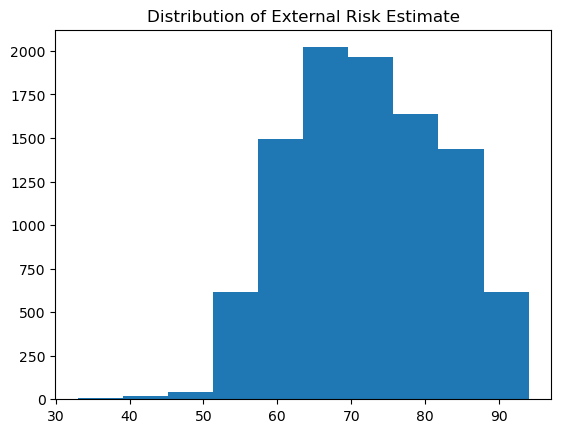

<Figure size 640x480 with 0 Axes>

In [55]:
ax = plt.subplot()
plt.hist(df.ExternalRiskEstimate)
plt.title("Distribution of External Risk Estimate")
plt.show()
plt.clf()

In [56]:
#Distribution appears normal. Small amount of null_values could be imputed as mean/median
mean1 = np.mean(df['ExternalRiskEstimate'][df['ExternalRiskEstimate'] > 0])
df['ExternalRiskEstimate'].replace(-8, mean1, inplace= True)

/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/3124831465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExternalRiskEstimate'].replace(-8, mean1, inplace= True)


In [57]:
#Clean MaxDeliquentEver into an ordinal category: 0-5 Delinquency
#derogatory can be defined as a past due or at credit risk
#0 - Never Deliquent or unknown or other. I.e. never deliquent or had the chance to be deliquent
#1 - 30 days
#2 - 60
#3 - 90
#4 - 120+
#5 - Still overdue/at default risk

In [58]:
#I Put negatives as a placeholder value
df.MaxDelqEver.replace(3, -4, inplace = True)
df.MaxDelqEver.replace(4, -3, inplace = True)
df.MaxDelqEver.replace(5, -2, inplace= True)
df.MaxDelqEver.replace(6, -1, inplace= True)
df.MaxDelqEver.replace(2, -5, inplace=True)
for i in [-7, -8, 0, 5, 6, 7, 8, 9]:
    df.MaxDelqEver.replace(i, 0, inplace = True)

#fixing to positive value once other values are removed.
for i in range(-5, 0):
    df.MaxDelqEver.replace(i, abs(i), inplace = True)


/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1914173996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxDelqEver.replace(3, -4, inplace = True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1914173996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxDelqEver.replace(4, -3, inplace = True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1914173996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [59]:
#Clean MaxDelq2PublicRecLast12M into an ordinal category: 0-5 Delinquency
#derogatory can be defined as a past due or at credit risk
#0 - Never Deliquent or unknown
#1 - 30 days
#2 - 60
#3 - 90
#4 - 120+
#5 - Still overdue/at risk of defaulting

In [60]:
df.MaxDelq2PublicRecLast12M.replace(0, -5, inplace=True)
df.MaxDelq2PublicRecLast12M.replace(1, -4, inplace=True)
df.MaxDelq2PublicRecLast12M.replace(2, -3, inplace=True)
df.MaxDelq2PublicRecLast12M.replace(3, -2, inplace=True)
df.MaxDelq2PublicRecLast12M.replace(4, -1, inplace=True)
for i in [-7, -8, 5, 6, 7, 8, 9]:
    df.MaxDelq2PublicRecLast12M.replace(i, 0, inplace = True)

for i in range(-5, 0):
    df.MaxDelq2PublicRecLast12M.replace(i, abs(i), inplace=True)



/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1592706049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxDelq2PublicRecLast12M.replace(0, -5, inplace=True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1592706049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxDelq2PublicRecLast12M.replace(1, -4, inplace=True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1592706049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [61]:
df.MaxDelqEver.value_counts()

0    4658
1    2867
2     968
5     738
3     319
4     311
Name: MaxDelqEver, dtype: int64

In [62]:
df.MaxDelq2PublicRecLast12M.value_counts()

0    7585
1    1612
5     334
2     224
4      54
3      52
Name: MaxDelq2PublicRecLast12M, dtype: int64

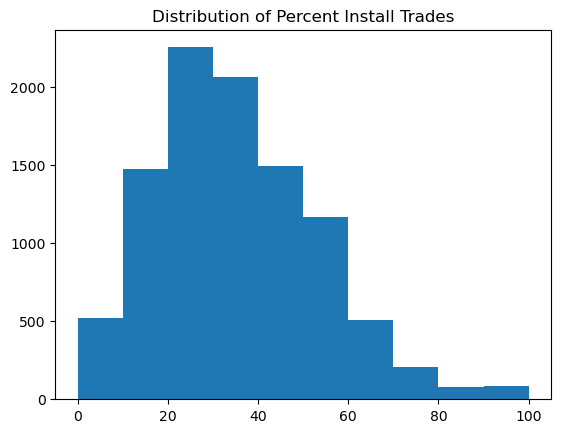

<Figure size 640x480 with 0 Axes>

In [63]:
ax = plt.subplot()
plt.hist(df['PercentInstallTrades'])
plt.title("Distribution of Percent Install Trades")
plt.show()
plt.clf()

In [64]:
# Slight Right Skew. Median in Null Values will be appropriate.
med_install = np.median(df['PercentInstallTrades'][df['PercentInstallTrades'] > 0])

df['PercentInstallTrades'].replace(-8, med_install, inplace= True)
df['PercentInstallTrades'].replace(-7, med_install, inplace= True)

/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/3876941819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PercentInstallTrades'].replace(-8, med_install, inplace= True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/3876941819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PercentInstallTrades'].replace(-7, med_install, inplace= True)


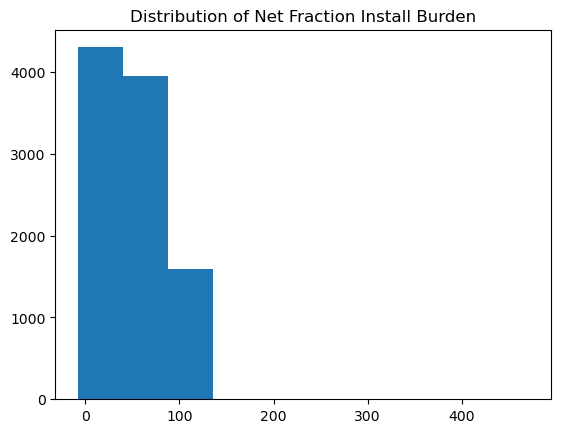

<Figure size 640x480 with 0 Axes>

In [65]:
ax = plt.subplot()
plt.hist(df['NetFractionInstallBurden'])
plt.title("Distribution of Net Fraction Install Burden")
plt.show()
plt.clf()

In [66]:
# Right Skew. Median in Null Values will be appropriate.
med_install = np.median(df['NetFractionInstallBurden'][df['NetFractionInstallBurden'] > 0])

df['NetFractionInstallBurden'].replace(-8, med_install, inplace= True)
df['NetFractionInstallBurden'].replace(-7, med_install, inplace= True)

/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1994394209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NetFractionInstallBurden'].replace(-8, med_install, inplace= True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1994394209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NetFractionInstallBurden'].replace(-7, med_install, inplace= True)


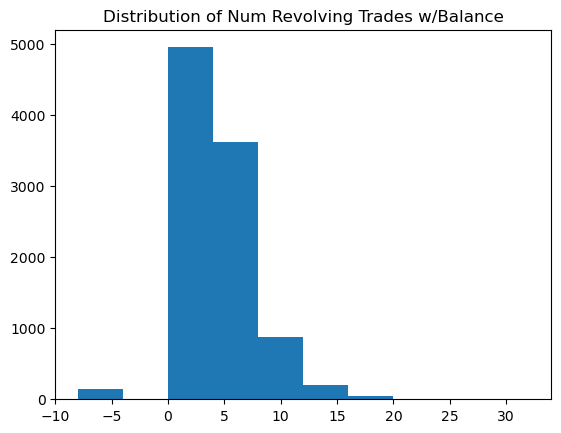

<Figure size 640x480 with 0 Axes>

In [67]:
ax = plt.subplot()
plt.hist(df['NumRevolvingTradesWBalance'])
plt.title("Distribution of Num Revolving Trades w/Balance")
plt.show()
plt.clf()

In [68]:
# Right Skew. Median in Null Values will be appropriate.
med_install = np.median(df['NumRevolvingTradesWBalance'][df['NumRevolvingTradesWBalance'] > 0])

df['NumRevolvingTradesWBalance'].replace(-8, med_install, inplace= True)
df['NumRevolvingTradesWBalance'].replace(-7, med_install, inplace= True)

/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/2629688865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumRevolvingTradesWBalance'].replace(-8, med_install, inplace= True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/2629688865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumRevolvingTradesWBalance'].replace(-7, med_install, inplace= True)


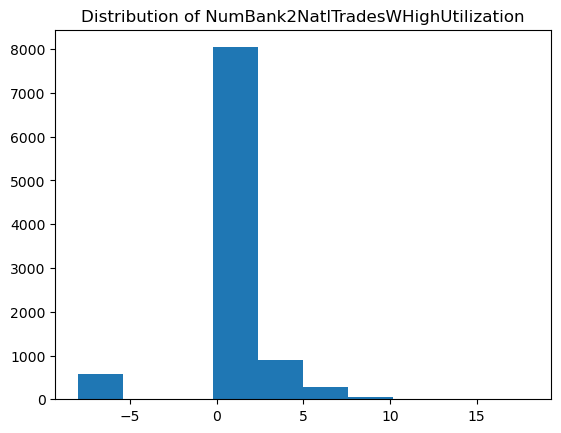

<Figure size 640x480 with 0 Axes>

In [69]:
ax = plt.subplot()
plt.hist(df['NumBank2NatlTradesWHighUtilization'])
plt.title("Distribution of NumBank2NatlTradesWHighUtilization")
plt.show()
plt.clf()

In [70]:
# Right Skew. Median in Null Values will be appropriate.
med_install = np.median(df['NumBank2NatlTradesWHighUtilization'][df['NumBank2NatlTradesWHighUtilization'] > 0])

df['NumBank2NatlTradesWHighUtilization'].replace(-8, med_install, inplace= True)
df['NumBank2NatlTradesWHighUtilization'].replace(-7, med_install, inplace= True)

/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1948554114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumBank2NatlTradesWHighUtilization'].replace(-8, med_install, inplace= True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1948554114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumBank2NatlTradesWHighUtilization'].replace(-7, med_install, inplace= True)


In [71]:
df.describe()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.00000,9861.000000,...,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000
mean,0.520028,72.060440,195.765947,9.520535,78.744245,21.130413,0.580570,0.383734,92.35899,7.709157,...,34.593348,0.192475,1.455532,1.396714,34.084170,70.421762,4.100395,1.577021,1.086705,66.371768
std,0.499624,9.871795,101.913629,12.288235,33.904646,11.302849,1.238056,0.991851,11.76934,20.735160,...,17.907026,5.855050,2.135229,2.095491,29.202295,20.307257,2.998827,3.337305,1.490772,22.162833
min,0.000000,33.000000,-8.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,-8.000000,...,0.000000,-8.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,-8.000000,0.000000,-8.000000
25%,0.000000,64.000000,131.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.00000,-7.000000,...,21.000000,0.000000,0.000000,0.000000,8.000000,65.000000,2.000000,1.000000,0.000000,50.000000
50%,1.000000,72.000000,183.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.00000,0.000000,...,33.000000,0.000000,1.000000,1.000000,28.000000,74.000000,3.000000,2.000000,1.000000,67.000000
75%,1.000000,80.000000,255.000000,12.000000,97.000000,28.000000,1.000000,0.000000,100.00000,15.000000,...,45.000000,1.000000,2.000000,2.000000,56.000000,80.000000,5.000000,3.000000,1.000000,83.000000
max,1.000000,94.000000,803.000000,227.000000,322.000000,79.000000,19.000000,19.000000,100.00000,83.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


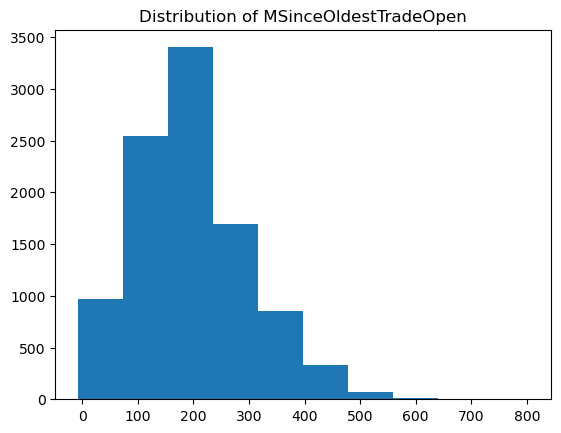

<Figure size 640x480 with 0 Axes>

In [72]:
ax = plt.subplot()
plt.hist(df['MSinceOldestTradeOpen'])
plt.title("Distribution of MSinceOldestTradeOpen")
plt.show()
plt.clf()

In [73]:
med_install = np.median(df['MSinceOldestTradeOpen'][df['MSinceOldestTradeOpen'] > 0])

df['MSinceOldestTradeOpen'].replace(-8, med_install, inplace= True)
df['MSinceOldestTradeOpen'].replace(-7, med_install, inplace= True)

/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/810221495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MSinceOldestTradeOpen'].replace(-8, med_install, inplace= True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/810221495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MSinceOldestTradeOpen'].replace(-7, med_install, inplace= True)


In [74]:
#Used the commented code below to see which tables held special values
for i in df.columns:
    test = df[df[i] < 0]
    print(test[i].value_counts())

Series([], Name: RiskPerformance, dtype: int64)
Series([], Name: ExternalRiskEstimate, dtype: int64)
Series([], Name: MSinceOldestTradeOpen, dtype: int64)
Series([], Name: MSinceMostRecentTradeOpen, dtype: int64)
Series([], Name: AverageMInFile, dtype: int64)
Series([], Name: NumSatisfactoryTrades, dtype: int64)
Series([], Name: NumTrades60Ever2DerogPubRec, dtype: int64)
Series([], Name: NumTrades90Ever2DerogPubRec, dtype: int64)
Series([], Name: PercentTradesNeverDelq, dtype: int64)
-7    4658
-8     176
Name: MSinceMostRecentDelq, dtype: int64
Series([], Name: MaxDelq2PublicRecLast12M, dtype: int64)
Series([], Name: MaxDelqEver, dtype: int64)
Series([], Name: NumTotalTrades, dtype: int64)
Series([], Name: NumTradesOpeninLast12M, dtype: int64)
Series([], Name: PercentInstallTrades, dtype: int64)
-7    1853
-8     476
Name: MSinceMostRecentInqexcl7days, dtype: int64
Series([], Name: NumInqLast6M, dtype: int64)
Series([], Name: NumInqLast6Mexcl7days, dtype: int64)
-8    179
Name: NetFra

In [75]:
df['MSinceMostRecentDelq'].value_counts()

#Could this be changed to Delq within last year, 2 years?

-7     4658
 1      307
 2      294
 3      252
 4      228
       ... 
 77      14
 74      12
 75       9
 82       1
 83       1
Name: MSinceMostRecentDelq, Length: 86, dtype: int64

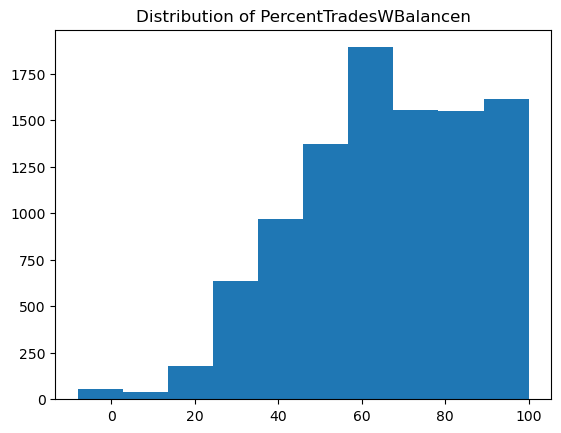

<Figure size 640x480 with 0 Axes>

In [76]:
ax = plt.subplot()
plt.hist(df['PercentTradesWBalance'])
plt.title("Distribution of PercentTradesWBalancen")
plt.show()
plt.clf()

In [77]:

med_install = np.median(df['PercentTradesWBalance'][df['PercentTradesWBalance'] > 0])

df['PercentTradesWBalance'].replace(-8, med_install, inplace= True)
df['PercentTradesWBalance'].replace(-7, med_install, inplace= True)


/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/3965038488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PercentTradesWBalance'].replace(-8, med_install, inplace= True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/3965038488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PercentTradesWBalance'].replace(-7, med_install, inplace= True)


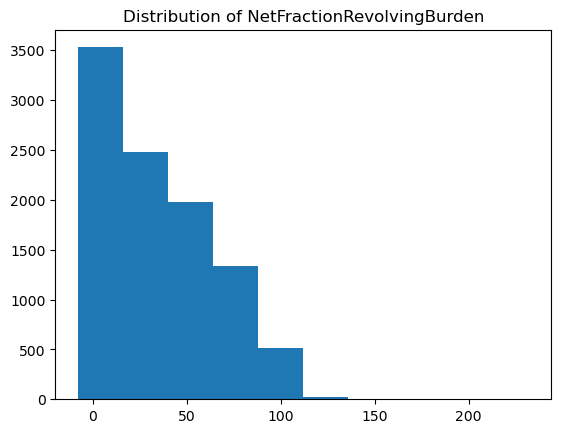

<Figure size 640x480 with 0 Axes>

In [78]:
ax = plt.subplot()
plt.hist(df['NetFractionRevolvingBurden'])
plt.title("Distribution of NetFractionRevolvingBurden")
plt.show()
plt.clf()

In [79]:
med_install = np.median(df['NetFractionRevolvingBurden'][df['NetFractionRevolvingBurden'] > 0])

df['NetFractionRevolvingBurden'].replace(-8, med_install, inplace= True)
df['NetFractionRevolvingBurden'].replace(-7, med_install, inplace= True)

/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1088696061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NetFractionRevolvingBurden'].replace(-8, med_install, inplace= True)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1088696061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NetFractionRevolvingBurden'].replace(-7, med_install, inplace= True)


In [80]:
df.describe()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.00000,9861.000000,...,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000
mean,0.520028,72.060440,200.467904,9.520535,78.744245,21.130413,0.580570,0.383734,92.35899,7.709157,...,34.593348,0.192475,1.455532,1.396714,34.810263,70.421762,4.100395,1.577021,1.086705,66.455430
std,0.499624,9.871795,96.747907,12.288235,33.904646,11.302849,1.238056,0.991851,11.76934,20.735160,...,17.907026,5.855050,2.135229,2.095491,28.638667,20.307257,2.998827,3.337305,1.490772,22.023033
min,0.000000,33.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,-8.000000,...,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000
25%,0.000000,64.000000,137.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.00000,-7.000000,...,21.000000,0.000000,0.000000,0.000000,9.000000,65.000000,2.000000,1.000000,0.000000,50.000000
50%,1.000000,72.000000,186.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.00000,0.000000,...,33.000000,0.000000,1.000000,1.000000,30.000000,74.000000,3.000000,2.000000,1.000000,67.000000
75%,1.000000,80.000000,255.000000,12.000000,97.000000,28.000000,1.000000,0.000000,100.00000,15.000000,...,45.000000,1.000000,2.000000,2.000000,56.000000,80.000000,5.000000,3.000000,1.000000,83.000000
max,1.000000,94.000000,803.000000,227.000000,322.000000,79.000000,19.000000,19.000000,100.00000,83.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [81]:
# To Handle MSince Most Recent Delq and MSinceMostRecentInqExcl7days I will create new variables called "RecentDelq_l1yr" "RecentDelq_2yr" to be able to handle -7/-8 as false
df['RecentDelq_1yr'] = df['MSinceMostRecentDelq'].apply(lambda row: 1 if row <= 12 and row >= 1 else 0)
df['RecentDeql_2yr'] = df['MSinceMostRecentDelq'].apply(lambda row: 1 if row >= 1 and row <= 24 else 0)

df['RecentInquiry_1yr_excl7days'] = df['MSinceMostRecentInqexcl7days'].apply(lambda row: 1 if row <= 12 and row >= 1 else 0)
df['RcentInquiry_2yr_excl7days'] = df['MSinceMostRecentInqexcl7days'].apply(lambda row: 1 if row >= 1 and row <= 24 else 0)

/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1878954843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecentDelq_1yr'] = df['MSinceMostRecentDelq'].apply(lambda row: 1 if row <= 12 and row >= 1 else 0)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T/ipykernel_99377/1878954843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecentDeql_2yr'] = df['MSinceMostRecentDelq'].apply(lambda row: 1 if row >= 1 and row <= 24 else 0)
/var/folders/65/6jjjy5f57wd70rxqtrr6hxlw0000gn/T

In [82]:
#Separating Target Column and Dropping Columns that have been mutated into other variables

target = df['RiskPerformance']
df = df.drop(['MSinceMostRecentDelq', 'MSinceMostRecentInqexcl7days', 'RiskPerformance'], axis = 1)

In [83]:
from sklearn import preprocessing

In [84]:
norm_df = df
norm_df = preprocessing.normalize(norm_df)
norm_df = pd.DataFrame(norm_df, columns = df.columns)
print(norm_df.head())

   ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
0              0.241395               0.632017                   0.017556   
1              0.357398               0.339821                   0.087885   
2              0.352271               0.347013                   0.026289   
3              0.245462               0.628531                   0.003719   
4              0.200351               0.823667                   0.066784   

   AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
0        0.368676               0.087780                     0.013167   
1        0.240218               0.011718                     0.023436   
2        0.126187               0.047320                     0.000000   
3        0.271496               0.104135                     0.003719   
4        0.326499               0.029682                     0.000000   

   NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
0                     0.000000          

In [85]:
scaled_df = df
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(d, columns = scaled_df.columns)
print(scaled_df.head())

   ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
0              0.360656               0.177278                   0.017621   
1              0.459016               0.069913                   0.066079   
2              0.557377               0.079900                   0.022026   
3              0.540984               0.208489                   0.004405   
4              0.786885               0.413233                   0.118943   

   AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
0        0.251572               0.253165                     0.157895   
1        0.116352               0.025316                     0.210526   
2        0.062893               0.113924                     0.000000   
3        0.216981               0.354430                     0.052632   
4        0.402516               0.151899                     0.000000   

   NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
0                     0.000000          

In [86]:
# Hi Samuel, I think you did a good job about handling the Data Cleaning and Pre-porcessing. 
# Please ask for opinions & advice from Modelling Team. Cheers!

In [88]:
scaled_df.to_csv("scaled.csv")

norm_df.to_csv("normalised.csv")

target.to_csv('target.csv')
